# Import Libararies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
model_df = pd.read_csv(r"C:\Users\josia\Desktop\Deep Learning Capstone\preprocessing_file.csv")

In [3]:
clean_df = pd.read_csv(r"C:\Users\josia\Desktop\Deep Learning Capstone\data_wrangling_cleaned_file.csv")

In [4]:
model_df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.440418,-0.453160,-0.909234,16884.92400,0,1,0,0,1
1,-1.511647,0.509422,-0.079442,1725.55230,1,0,0,1,0
2,-0.799350,0.383155,1.580143,4449.46200,1,0,0,1,0
3,-0.443201,-1.305052,-0.909234,21984.47061,1,0,1,0,0
4,-0.514431,-0.292456,-0.909234,3866.85520,1,0,1,0,0


In [5]:
clean_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Exploratory Data Analysis

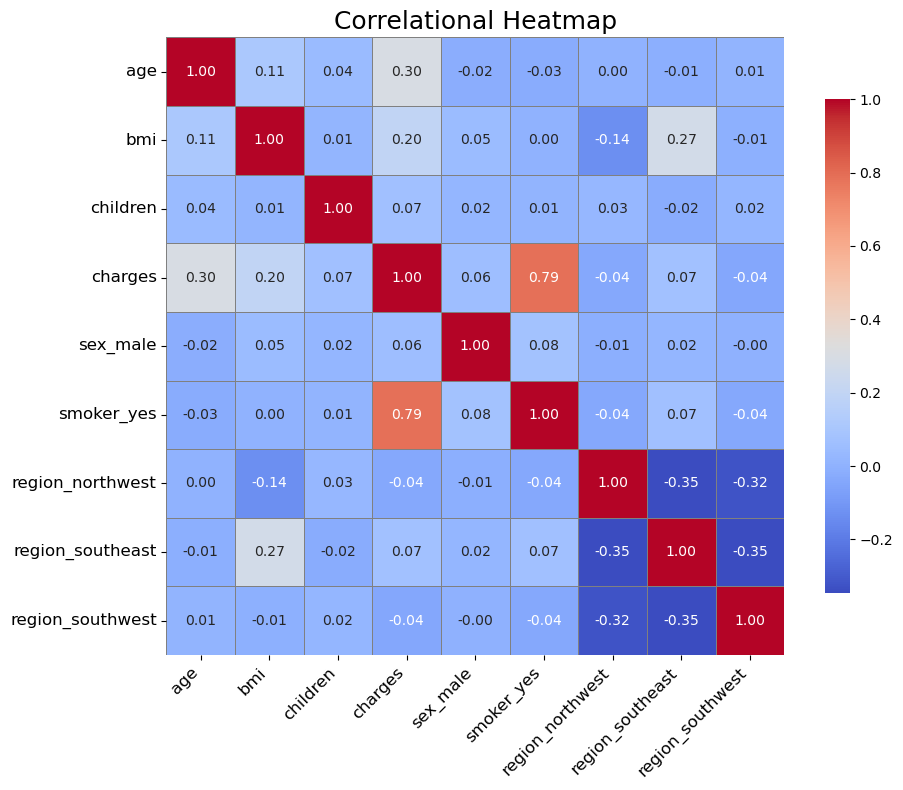

In [6]:
corr = model_df.corr()
plt.figure(figsize=(10, 8))


sns.heatmap(
    corr, 
    annot=True,               
    cmap='coolwarm',      
    fmt=".2f",             
    linewidths=.5,          
    linecolor='gray',       
    square=True,            
    cbar_kws={"shrink": .8}  
)

plt.title('Correlational Heatmap', fontsize=18)     
plt.xticks(rotation=45, ha='right', fontsize=12)     
plt.yticks(rotation=0, fontsize=12)                  
plt.tight_layout()                                 

plt.show()


It appears that the top three strongest correlators with charges are smoking, age, and bmi

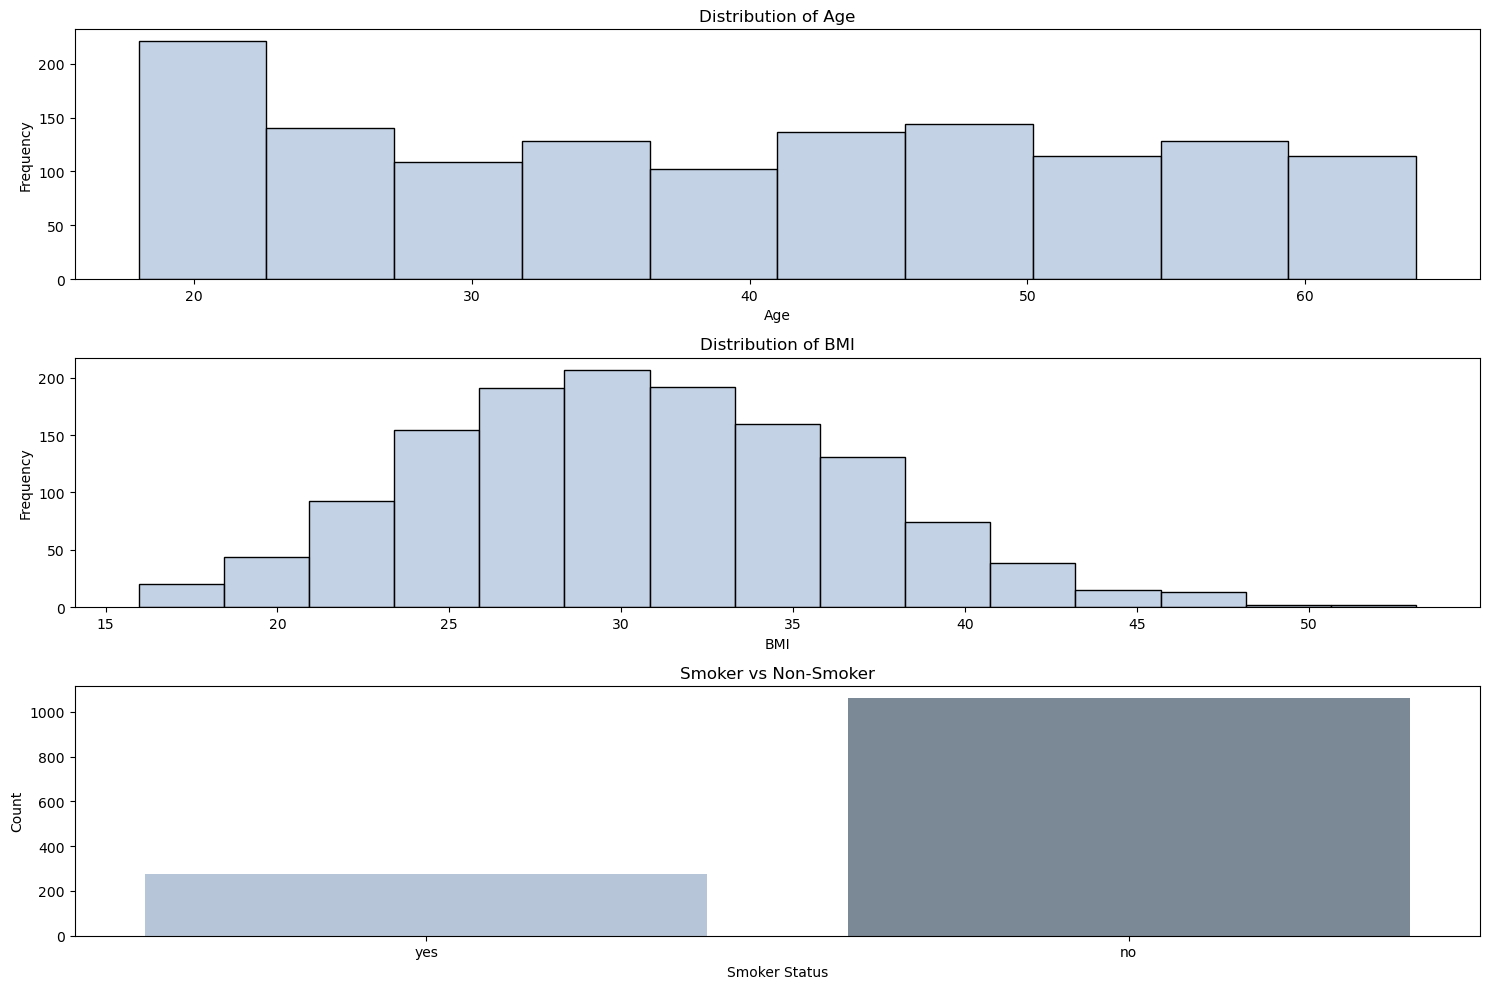

In [7]:
plt.figure(figsize=(15, 10))

# Distribution of Age
plt.subplot(3, 1, 1)  
sns.histplot(clean_df['age'], bins=10, color='lightsteelblue')
plt.title('Distribution of Age')
plt.xlabel('Age') 
plt.ylabel('Frequency') 
plt.grid(False)  

# Distribution of BMI
plt.subplot(3, 1, 2) 
sns.histplot(clean_df['bmi'], bins=15, color='lightsteelblue')
plt.title('Distribution of BMI')
plt.xlabel('BMI')  
plt.ylabel('Frequency') 
plt.grid(False)  

# Smoker vs Non-Smoker Count
plt.subplot(3, 1, 3) 
pal_2 = ['lightsteelblue', 'lightslategray']
sns.countplot(x='smoker', data=clean_df, palette=pal_2)
plt.title('Smoker vs Non-Smoker')
plt.xlabel('Smoker Status') 
plt.ylabel('Count')  
plt.grid(False)  


plt.tight_layout()


plt.show()

It appears that age is relatively evenly distributed in this dataframe. However, there is a larger number of young individuals sampled around age 20 than in other age groups

It appears that bmi in our dataset has a normal distribution

While smoking appears to be a great predictor of charges, the majority of individuals in this dataset are not smokers

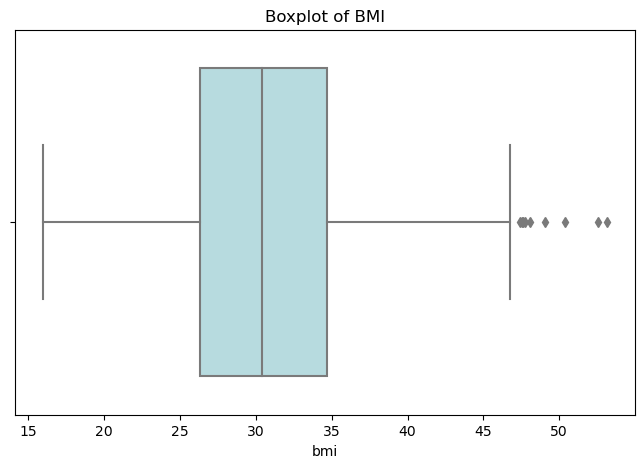

In [8]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=clean_df['bmi'], color = 'powderblue')
plt.title(f'Boxplot of BMI')
plt.show()

This distribution does have a few outliers with respect to bmi

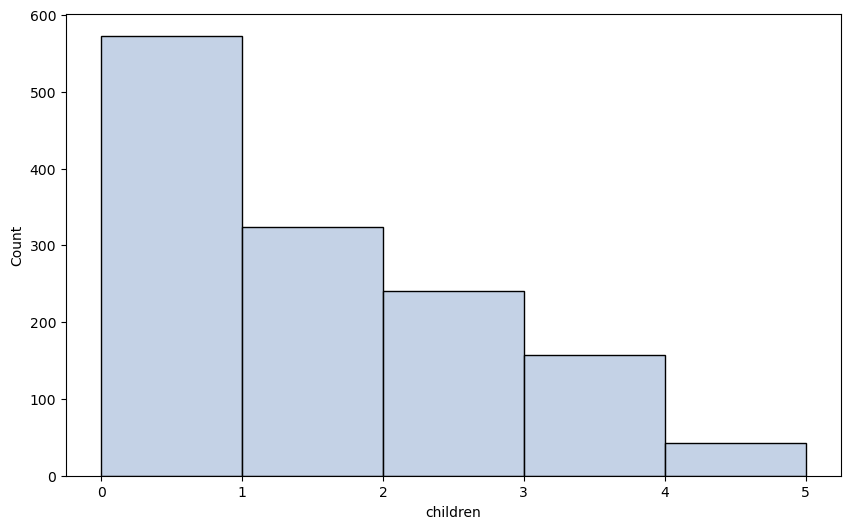

In [9]:
#distribution of no. of children
plt.figure(figsize=(10, 6))
sns.histplot(clean_df['children'], bins=5, color='lightsteelblue')
plt.show()

It appears that there is a positively skewed distribution with respect to the number of children, which the majority of indivudals having none to fewer children

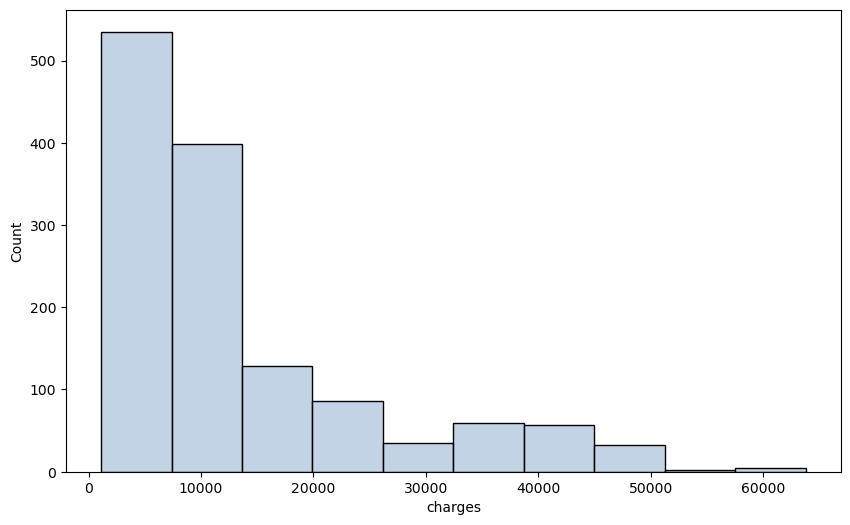

In [10]:
#distribution of charges
plt.figure(figsize=(10, 6))
sns.histplot(clean_df['charges'], bins=10, color='lightsteelblue')
plt.show()

It appears that charges also follow a positively skewed distribution; however, it is possible that there is some slight bimodalitiy in the data

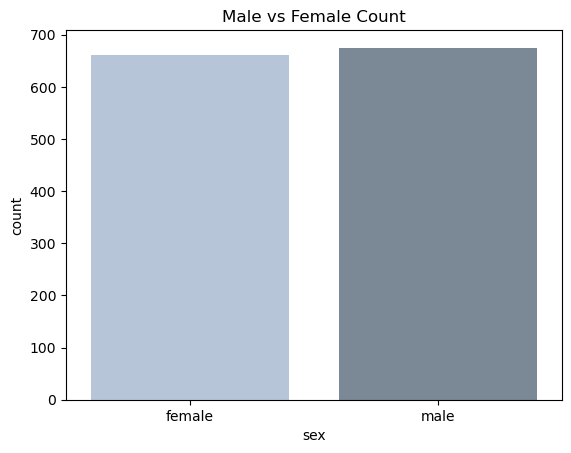

In [11]:
# sex male vs female
pal_2 = ['lightsteelblue', 'lightslategray']
sns.countplot(x='sex', data=clean_df, palette=pal_2)
plt.title('Male vs Female Count')
plt.show()

The dataset is well balanced with respect to male vs female class

<Axes: xlabel='region', ylabel='charges'>

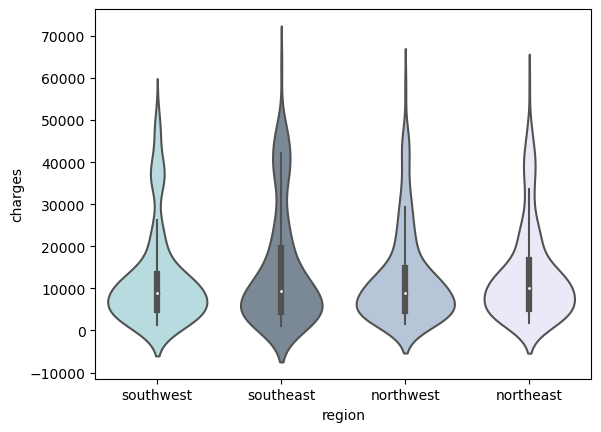

In [12]:
#distribution of charges by region
color_temp = ['powderblue', 'lightslategray', 'lightsteelblue', 'lavender']
sns.violinplot(x='region', y='charges', data=clean_df, palette=color_temp)

Examing charges by region further suggests a slight bimodality in charges distribution

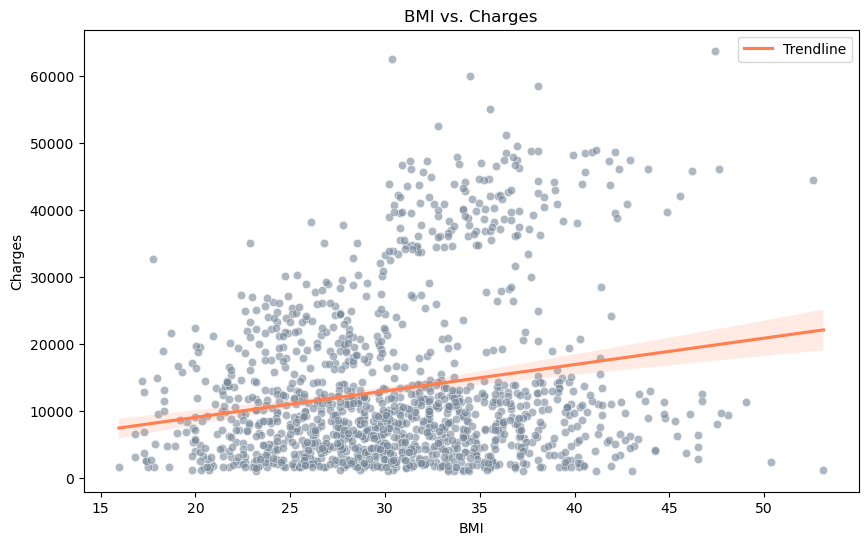

In [13]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=clean_df, x='bmi', y='charges', color='lightslategray', alpha=0.6)

sns.regplot(data=clean_df, x='bmi', y='charges', scatter=False, color='coral', label='Trendline')

plt.title('BMI vs. Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend()
plt.show()

<Axes: xlabel='bmi', ylabel='charges'>

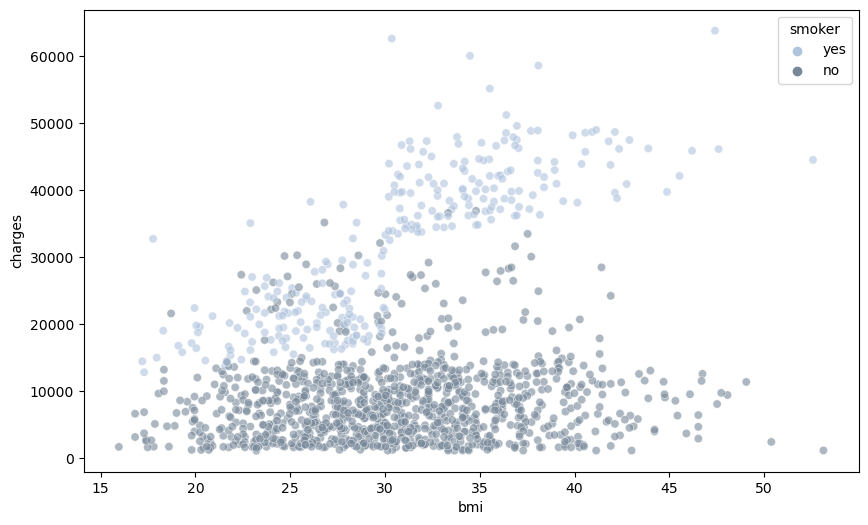

In [14]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='bmi', y='charges', hue='smoker', palette = pal_2, data=clean_df, alpha=0.6)

As one can clearly see from the previous two charts, BMI is correlated with charges but if you are a smoker or not has a much greater effect on charges

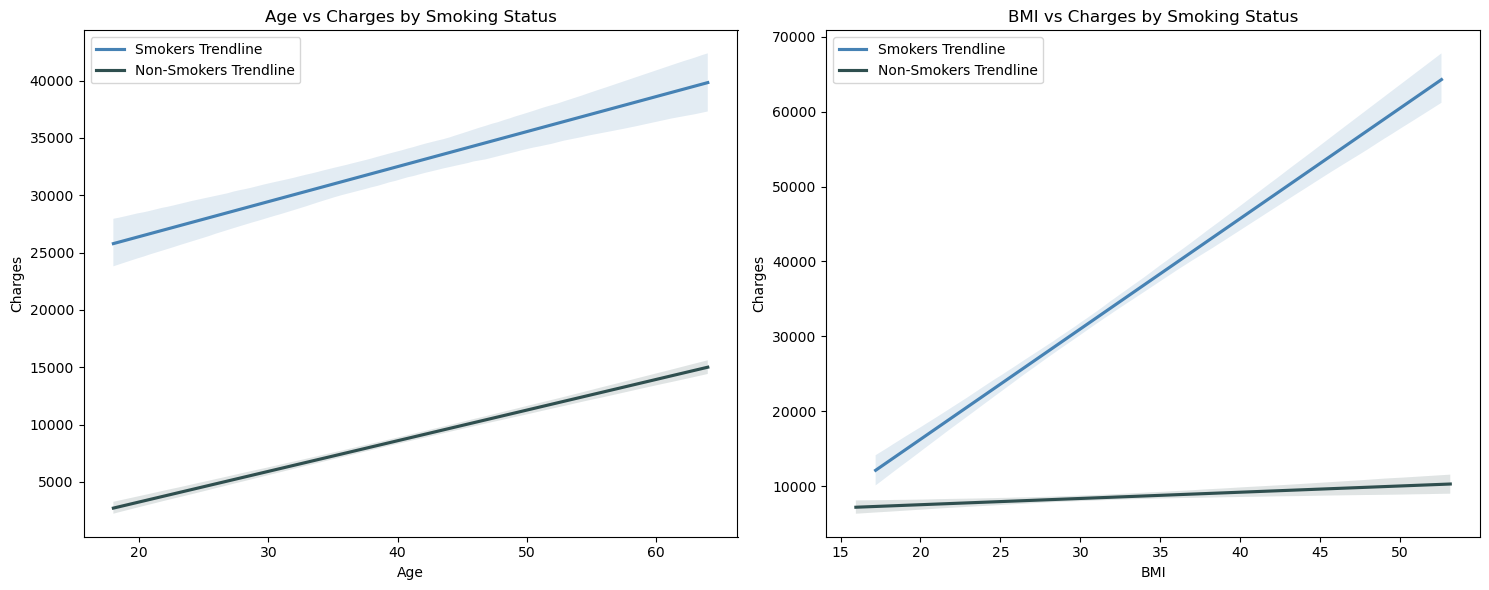

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # 1 row, 2 columns

sns.regplot(data=clean_df[clean_df['smoker'] == 'yes'], x='age', y='charges', scatter=False, color='steelblue', label='Smokers Trendline', ax=axes[0])
sns.regplot(data=clean_df[clean_df['smoker'] == 'no'], x='age', y='charges', scatter=False, color='darkslategray', label='Non-Smokers Trendline', ax=axes[0])
axes[0].set_title('Age vs Charges by Smoking Status')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Charges')
axes[0].legend()
axes[0].grid(False)

sns.regplot(data=clean_df[clean_df['smoker'] == 'yes'], x='bmi', y='charges', scatter=False, color='steelblue', label='Smokers Trendline', ax=axes[1])
sns.regplot(data=clean_df[clean_df['smoker'] == 'no'], x='bmi', y='charges', scatter=False, color='darkslategray', label='Non-Smokers Trendline', ax=axes[1])
axes[1].set_title('BMI vs Charges by Smoking Status')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Charges')
axes[1].legend()
axes[1].grid(False)

plt.tight_layout()


As one can clearly see from the previous two charts, BMI is correlated with charges but if you are a smoker or not has a much greater effect on charges

This chart is very intersting because it shows that age is also a good predictor of charges; however, if you smoke, you are at a much greater risk of having higher charges across your entire lifespan